In [17]:
## Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Data collection and analysis

In [18]:
## Loading the dataset into pandas dataframe
d_frame=pd.read_csv('diabetes_dataset.csv', index_col=0)
d_frame

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,,,,,,,,
Female,80.0,0,1,never,25.19,6.6,140,0
Female,54.0,0,0,No Info,27.32,6.6,80,0
Male,28.0,0,0,never,27.32,5.7,158,0
Female,36.0,0,0,current,23.45,5.0,155,0
Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...
Female,80.0,0,0,No Info,27.32,6.2,90,0
Female,2.0,0,0,No Info,17.37,6.5,100,0
Male,66.0,0,0,former,27.83,5.7,155,0


In [19]:
## Number of rows and columns in the dataset

d_frame.shape

(100000, 8)

In [20]:
df = d_frame.copy()
df.columns

Index(['age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi',
       'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

# Exploratory data analysis
Getting to know the data

Data Processing (Missing values)

Cross Tables and data visualisation

In [21]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, Female to Female
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  100000 non-null  float64
 1   hypertension         100000 non-null  int64  
 2   heart_disease        100000 non-null  int64  
 3   smoking_history      100000 non-null  object 
 4   bmi                  100000 non-null  float64
 5   HbA1c_level          100000 non-null  float64
 6   blood_glucose_level  100000 non-null  int64  
 7   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 6.9+ MB


In [22]:
## Hnandling missing values
df.isna().sum()

age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [23]:
df.describe()  # Dispalying numerical data

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [24]:
df.describe(include='O') # Printing categorical variables ie non-numerical variables

,smoking_history
count,100000
unique,6
top,No Info
freq,35816


In [25]:
## Encoding categorical variables
from sklearn.preprocessing import LabelEncoder
# Only encode if not already encoded
if 'smoking_history' in df.columns:
    df = pd.get_dummies(df, columns=['smoking_history'])
df.head()    

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
gender,,,,,,,,,,,,,
Female,80.0,0,1,25.19,6.6,140,0,0,0,0,0,1,0
Female,54.0,0,0,27.32,6.6,80,0,1,0,0,0,0,0
Male,28.0,0,0,27.32,5.7,158,0,0,0,0,0,1,0
Female,36.0,0,0,23.45,5.0,155,0,0,1,0,0,0,0
Male,76.0,1,1,20.14,4.8,155,0,0,1,0,0,0,0


In [26]:
## dropping null values
df=df.dropna(how='any')


In [27]:
df.isna().sum()

age                            0
hypertension                   0
heart_disease                  0
bmi                            0
HbA1c_level                    0
blood_glucose_level            0
diabetes                       0
smoking_history_No Info        0
smoking_history_current        0
smoking_history_ever           0
smoking_history_former         0
smoking_history_never          0
smoking_history_not current    0
dtype: int64

In [28]:
#relationship between variables
corr=df.corr()
corr

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
age,1.000000,0.251171,0.233354,0.337396,0.101354,0.110672,0.258008,-0.276945,0.030946,0.065768,0.216481,0.065498,0.067663
hypertension,0.251171,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823,-0.117210,0.017930,0.023124,0.083401,0.045953,0.000997
heart_disease,0.233354,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727,-0.052398,0.007604,0.040671,0.095194,-0.030843,0.007922
bmi,0.337396,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357,-0.222553,0.053617,0.044343,0.111312,0.086849,0.034979
HbA1c_level,0.101354,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660,-0.045979,0.006123,0.009655,0.037306,0.010684,0.009830
blood_glucose_level,0.110672,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558,-0.051635,0.012447,0.006267,0.040688,0.012475,0.008613
diabetes,0.258008,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000,-0.118939,0.019606,0.024080,0.097917,0.027267,0.020734
smoking_history_No Info,-0.276945,-0.117210,-0.052398,-0.222553,-0.045979,-0.051635,-0.118939,1.000000,-0.239002,-0.152562,-0.239938,-0.549299,-0.196099
smoking_history_current,0.030946,0.017930,0.007604,0.053617,0.006123,0.012447,0.019606,-0.239002,1.000000,-0.065343,-0.102766,-0.235267,-0.083990
smoking_history_ever,0.065768,0.023124,0.040671,0.044343,0.009655,0.006267,0.024080,-0.152562,-0.065343,1.000000,-0.065598,-0.150177,-0.053613


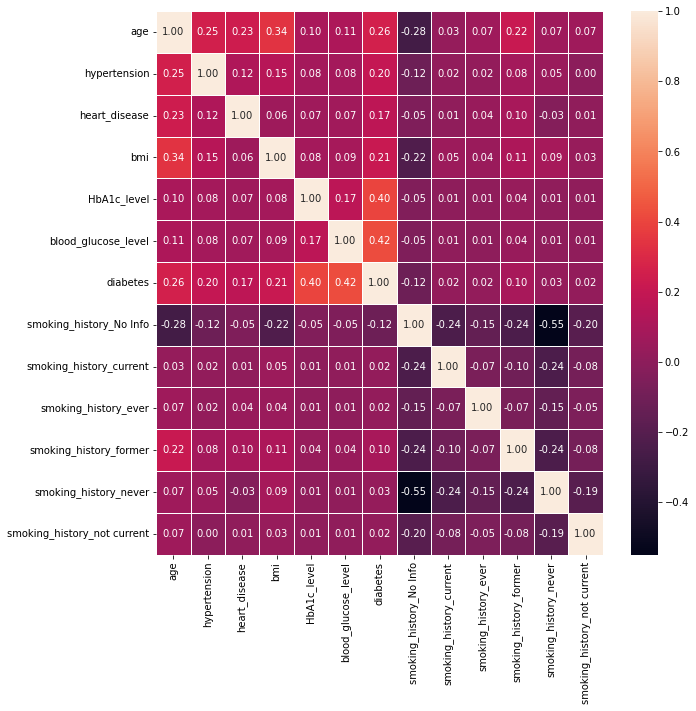

In [29]:

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, linewidth=0.5,fmt='0.2f')
plt.show()

 # Feature Engineering

In [30]:

from sklearn.preprocessing import StandardScaler, LabelEncoder


## Splitting the data into features and target variable
X = df.drop('diabetes', axis=1)
y = df['diabetes']

In [31]:
from sklearn.model_selection import train_test_split

# Train and test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(X.shape, X_train.shape, X_test.shape)

(100000, 12) (80000, 12) (20000, 12)


In [32]:
# Feature Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Development

In [ ]:
# Initializing models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import seaborn as sns

models = {    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(kernel='linear', probability=True, random_state=42)
}

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
lr_clf = LogisticRegression(random_state=42, max_iter=1000)
svm_clf = SVC(probability=True, random_state=42)

# Hyperparameter tuning 

In [ ]:

# from sklearn.model_selection import GridSearchCV


# # Hyperparameter tuning  for Random Forest

# param_grid_rf = {
#     'n_estimators': [100, 200],
#     'max_depth': [None, 10, 20]
# }
# grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='roc_auc')
# grid_search_rf.fit(X_train, y_train)
# models['Random Forest'] = grid_search_rf.best_estimator_
# print(f"Best params for Random Forest: {grid_search_rf.best_params_}")



Best params for Random Forest: {'max_depth': 10, 'n_estimators': 100}


In [ ]:

# # # Hyperparameter tuning  for Logistic Regression
# param_grid_lr = {
#     'C': [0.01, 0.1, 1, 10]
# }
# grid_search_lr = GridSearchCV(LogisticRegression(random_state=42, solver='liblinear'), param_grid_lr, cv=5, scoring='roc_auc')
# grid_search_lr.fit(X_train, y_train)
# models['Logistic Regression'] = grid_search_lr.best_estimator_
# print(f"Best params for Logistic Regression: {grid_search_lr.best_params_}")



Best params for Logistic Regression: {'C': 1}


In [ ]:

# # Hyperparameter tuning  for SVM
# param_grid_svm = {
#     'C': [0.1, 1, 10],
#     'kernel': ['linear']
# }
# grid_search_svm = GridSearchCV(SVC(probability=True, random_state=42), param_grid_svm, cv=5, scoring='roc_auc')
# grid_search_svm.fit(X_train, y_train)
# models['Support Vector Machine'] = grid_search_svm.best_estimator_
# print(f"Best params for Support Vector Machine: {grid_search_svm.best_params_}")


# Hyperparameter tuning for SVM
# param_grid_svm = {
#     'C': [0.1, 1, 10],
#     'kernel': ['linear'] 
# }
# grid_search_svm = GridSearchCV(SVC(random_state=42), 
#                               param_grid_svm, cv=3, scoring='roc_auc', 
#                               n_jobs=-1, verbose=2)
# grid_search_svm.fit(X_train, y_train)
# models['Support Vector Machine'] = grid_search_svm.best_estimator_
# print(f"Best params for Support Vector Machine: {grid_search_svm.best_params_}")

In [ ]:
# Creating ensemble model with a VotingClassifier
from sklearn.ensemble import VotingClassifier
ensemble_clf = VotingClassifier(
    estimators=[('rf', rf_clf), ('lr', lr_clf), ('svm', svm_clf)],
    voting='soft'
)

In [ ]:
# Create the full pipeline
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', ensemble_clf)])


In [ ]:
# Train the model
from sklearn.metrics import classification_report, confusion_matrix
pipeline.fit(X_train, y_train)

# Model Evaluation
y_pred = pipeline.predict(X_test)

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Model Interpretation with SHAP
# SHAP requires a function that takes a numpy array and returns predictions
# We'll create a wrapper for our pipeline's prediction function
def predict_fn(x):
    return pipeline.predict_proba(pd.DataFrame(x, columns=X_test.columns))

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:,1] if hasattr(model, "predict_proba") else model.decision_function(X_test_scaled)
    results[name] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "f1": f1_score(y_test, y_pred),
        "roc_auc": roc_auc_score(y_test, y_proba),
        "classification_report": classification_report(y_test, y_pred)
    }
    print(f"\n{name} Classification Report:\n", results[name]["classification_report"])


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99     18300
           1       1.00      0.67      0.81      1700

    accuracy                           0.97     20000
   macro avg       0.99      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     18300
           1       0.86      0.64      0.73      1700

    accuracy                           0.96     20000
   macro avg       0.91      0.81      0.85     20000
weighted avg       0.96      0.96      0.96     20000



# Model Interpretability

In [ ]:
import shap
import lime
import lime.lime_tabular

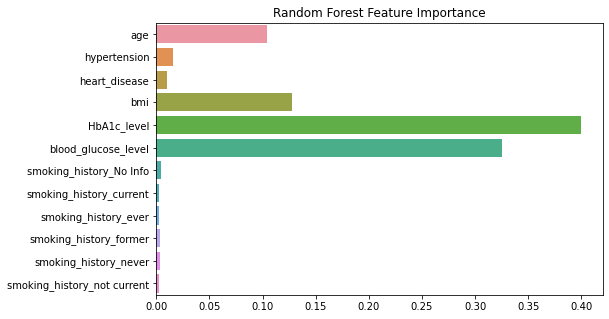

In [ ]:

# Feature Importance for Random Forest
rf = models["Random Forest"]
importances = rf.feature_importances_
feat_names = X.columns
plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=feat_names)
plt.title("Random Forest Feature Importance")
plt.show()



In [ ]:
# SHAP for interpretability (using Random Forest as example)
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test_scaled)
shap.summary_plot(shap_values[1], X_test, plot_type="bar")

### LIME explanation for a single prediction

In [ ]:
# We'll use the Random Forest model for this example
rf_model = models[' Random Forest']

# LIME for explaining a single prediction
explainer = lime.lime_tabular.LimeTabularExplainer(    training_data=X_train_scaled,
    feature_names=X.columns.tolist(),
    class_names=['not diabetic', 'diabetic'],
    mode='classification'
)

# We'll explain the first instance in the test set
i = 0
exp = explainer.explain_instance(    data_row=X_test_scaled[i],    predict_fn=rf_model.predict_proba
)

exp.show_in_notebook(show_table=True)

### SHAP Force plot for a single prediction

In [ ]:
# SHAP force plot for a single prediction
shap.initjs()
# explain the first prediction in the test set
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X_test.iloc[0,:])

### SHAP Dependence plots

In [ ]:
# SHAP dependence plots
# Create dependence plot for the top features
shap.dependence_plot("blood_glucose_level", shap_values[1], X_test)
shap.dependence_plot("bmi", shap_values[1], X_test)
shap.dependence_plot("age", shap_values[1], X_test)

(768, 8) (614, 8) (154, 8)


Training the model

In [ ]:
classifier = svm.SVC(kernel = 'linear')

In [ ]:
## Training the support vector machine classifier

classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation

In [ ]:
## Accuracy score on training data

X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print("Accuracy score of the training data : ", training_data_accuracy)

Accuracy score of the training data :  0.7866449511400652


In [ ]:
## Accuracy score on test data

X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print("Accuracy score of the test data : ", test_data_accuracy)

Accuracy score of the test data :  0.7727272727272727


Making a Predictive system

In [ ]:
input_data = (6,48,72,35,0,33.6,0.627,50)

## Changing the input data to numpy array

input_data_numpy_array = np.asarray(input_data)

## Reshape the array as we are prdiciting one instance

input_data_reshaped = input_data_numpy_array.reshape(1, -1)

## Standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print("The person is not diabetic")
else:
    print("The person is diabetic")

[[ 0.63994726 -2.28139074  0.14964075  0.90726993 -0.69289057  0.20401277
   0.46849198  1.4259954 ]]
[0]
The person is not diabetic


# Saving the model

In [ ]:
import pickle

In [ ]:
filename = 'diabetes_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [ ]:
# Loading the saved model
loaded_model = pickle.load(open('diabetes_model.sav', 'rb'))